# Manufacturing Data Science 製造數據科學 - Assignment 2
> R10725012 呂晟維

### Q1 (20%)

#### Q1-(a) 
**試簡述何謂維度的詛咒？試列舉一案例說明**

Ans:  
模型的參數數量與模型本身的複雜度與資料集的特徵維度呈正相關，
模型的參數數量越多，使模型達成收斂需要的資料筆數也就越多，當樣本數不足時會導致
1. 花很長時間學習但演算法不易收斂
2. 收斂時出現多重解 (multiple solutions) 或過度配適

簡而言之，特徵從零變多模型的預測能力一開始會提升，當過了最適的特徵個數，預測績效立即呈現指數遞減。

#### Q1-(b)
**避免維度詛咒的方法有哪些？**  
Ans  
1. 避免使用過多特徵，僅使用最適的特徵個數數量的作為訓練資料。
2. 檢查特徵間是否有共線性關係，若有則整合或剔除具共線性關係的特徵們。

#### Q1-(c)
試找一個開放數據 (e.g. Kaggle開放數據 或第一次作業紅酒數據集 )並選一種方法 (e.g. 線性迴歸或決策樹 )，用模擬方法 固定樣本數但逐步增加變數個數， 試著重新繪製圖 3.12， 呈現維度與預測 (或分類 )績效間的關係。

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
# import statsmodels.stats.api as sms
# import scipy.stats as stats

In [2]:
# import wine data, x = f0~f27, y = grade
furnace_data = pd.read_csv("../MDS_Assignment1/MDS_Assignment1_furnace.csv")
print(furnace_data.shape)
display(furnace_data.head())

(620, 29)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [3]:
furnace_X = furnace_data.iloc[:, :-1] # params
furnace_y = furnace_data.iloc[:, -1] # label
furnace_X_const = sm.add_constant(furnace_X) # 做線性回歸前 要手動加上截距(常數項)
furnace_X_const = furnace_X_const.rename(columns={"const": "Intercept"})
display(furnace_X_const.head())
print('labels are:', set(furnace_y))

,Intercept,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,1.0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129
1,1.0,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129
2,1.0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129
3,1.0,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129
4,1.0,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129


labels are: {0, 1, 2, 3, 4}


In [4]:
# (1) 整體資料先做線性迴歸；
# (2) 依 p value 小至大排序選出重要變數；
furnace_model = sm.OLS(furnace_y, furnace_X_const)
furnace_result = furnace_model.fit()
# print(furnace_result.summary())
print('rsquared:', furnace_result.rsquared, '\nrsquared_adj:', furnace_result.rsquared_adj)

furnace_pvalues = furnace_result.pvalues
print(furnace_pvalues.sort_values().head(3)) # p 越小影響力越大
print(furnace_pvalues.sort_values().tail(3)) # p 越大影響力越小

sorted_pvalues = list(furnace_pvalues.sort_values().keys())
print(f"sorted_pvalues: {sorted_pvalues}")

rsquared: 0.4953759883189156 
rsquared_adj: 0.47236104184021754
Intercept    0.000000e+00
f18          6.355895e-19
f2           2.430368e-18
dtype: float64
f4     0.927523
f9     0.976734
f12    0.978520
dtype: float64
sorted_pvalues: ['Intercept', 'f18', 'f2', 'f14', 'f15', 'f22', 'f17', 'f25', 'f6', 'f5', 'f8', 'f10', 'f16', 'f26', 'f1', 'f11', 'f13', 'f21', 'f19', 'f7', 'f24', 'f20', 'f3', 'f23', 'f27', 'f0', 'f4', 'f9', 'f12']


In [5]:
# 這個 function 吃全域變數喔

def make_formula(numOfParam: int) -> str:
    ''' 1 <= numOfParam <= 28 \n
    no need to add constant \n
    example output formula with numOfParam = 4:
    `grade ~ f0 + f1 + f2 + f3` '''
    if numOfParam < 1:
        numOfParam = 1
    if numOfParam > 28:
        numOfParam = 28
    param_lst = sorted_pvalues[1:]

    s = f"{furnace_data.columns[-1]} ~" # label
    first_param = True
    for x in param_lst[:numOfParam]:
        if first_param:
            s += f' {x}' # s += ' param'
            first_param = False
        else:
            s += f' + {x}' # s += ' + param'
    return s

make_formula(1) # min param
make_formula(28) # max param

'grade ~ f18 + f2 + f14 + f15 + f22 + f17 + f25 + f6 + f5 + f8 + f10 + f16 + f26 + f1 + f11 + f13 + f21 + f19 + f7 + f24 + f20 + f3 + f23 + f27 + f0 + f4 + f9 + f12'

rsquared_adj with 1 params: 0.0768328566497618
rsquared_adj with 2 params: 0.2733340635593492
rsquared_adj with 3 params: 0.3698974444769454
rsquared_adj with 4 params: 0.403183398054795
rsquared_adj with 5 params: 0.40785545925955646
rsquared_adj with 6 params: 0.42001562082854216
rsquared_adj with 7 params: 0.4285362248761698
rsquared_adj with 8 params: 0.43853624721293083
rsquared_adj with 9 params: 0.45807965568098774
rsquared_adj with 10 params: 0.46265152545839194
rsquared_adj with 11 params: 0.463196399481141
rsquared_adj with 12 params: 0.4638875207178982
rsquared_adj with 13 params: 0.463205216427506
rsquared_adj with 14 params: 0.46887115935744694
rsquared_adj with 15 params: 0.4710314997153918
rsquared_adj with 16 params: 0.47380057970710177
rsquared_adj with 17 params: 0.4743601222244074
rsquared_adj with 18 params: 0.47793486673311314
rsquared_adj with 19 params: 0.47772708760295834
rsquared_adj with 20 params: 0.4773850741928837
rsquared_adj with 21 params: 0.476926884878

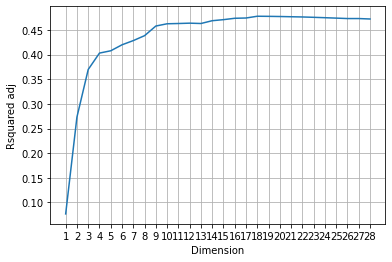

In [10]:
# (3) 將重要的變數一個個依序放入迴歸並計算 adjusted R2 作為預測準確度
# formula string format: 'Label ~ param1 + param2 ...'
numOfTest = len(sorted_pvalues[1:])
rsquared_adj_lst = []

for i in range(1, numOfTest+1):
    formula_str = make_formula(i)
    result = smf.ols(formula=formula_str, data=furnace_data).fit()
    print(f'rsquared_adj with {i} params: {result.rsquared_adj}')
    rsquared_adj_lst.append(result.rsquared_adj)

plt.plot(rsquared_adj_lst)
plt.xlabel('Dimension') 
plt.ylabel('Rsquared adj')
plt.xticks(np.arange(numOfTest), np.arange(1, numOfTest+1))
plt.grid()

# result = smf.ols(formula=formula_str, data=furnace_data).fit()
# print('rsquared:', result.rsquared, '\nrsquared_adj:', result.rsquared_adj)

### Q2 (20%)

#### Q2-(a)
試找一個開放數據 (e.g. Kaggle開放數據 )，您會用什麼方法來確認資料品質的好壞?試操作一次並說明其細節

In [78]:
# https://www.kaggle.com/datasets/whenamancodes/covid-19-coronavirus-pandemic-dataset
# https://www.kaggle.com/datasets/segunadedipe/nigerian-car-prices
df = pd.read_csv("Nigerian_Car_Prices.csv")
df = df.iloc[:, 1:]
print(df.shape)
df.head()

(4095, 9)


,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN


Missing value rate is 13.61%. (5015 out of 36855)


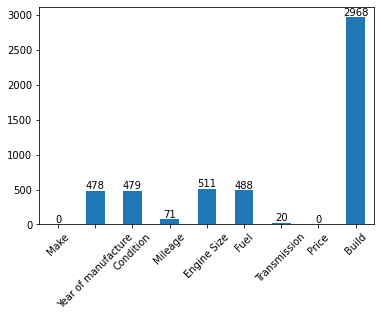

In [74]:
# Missing value rate
# ref https://datatofish.com/check-nan-pandas-dataframe/
numOfNanCell = df.isnull().sum().sum()
numOfTotalCall = df.shape[0]*df.shape[1]
missRate = numOfNanCell / numOfTotalCall
print(f"Missing value rate is {100*missRate:.2f}%. ({numOfNanCell} out of {numOfTotalCall})")

# df.isnull().sum().plot(kind='bar')
ax = df.isnull().sum().plot.bar(rot=45)
for container in ax.containers:
    ax.bar_label(container)

In [79]:
df['Make'].value_counts(normalize=True, sort=True).head()

Toyota           0.358730
Lexus            0.113309
Mercedes-Benz    0.106471
Honda            0.104518
Ford             0.048107
Name: Make, dtype: float64

In [75]:
# 進行獨行性測試(OLS建模)之前，需要補空值，把類別轉成數值
def format_float(x: str):
    return x.replace(',','')  

df['Price'] = df['Price'].apply(lambda x: format_float(x))
       
# 數值資料填 mean
for col_name in ['Year of manufacture', 'Mileage', 'Engine Size', 'Price']:
    df[col_name] = pd.to_numeric(df[col_name])
    df[col_name].fillna(value=df[col_name].mean(), inplace=True)
# df.fillna(value=0, inplace=True)

# 類別資料轉成 0,1,2 空值 -1
for col_name in ['Make', 'Condition', 'Fuel', 'Transmission', 'Build']:
    # df[col_name] = df[col_name].astype('category')
    df[col_name] = pd.factorize( df[col_name] )[0]
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,2007.000000,0,166418.0,2400.000000,0,0,3120000,-1
1,1,2007.898535,-1,138024.0,3274.976562,-1,0,5834000,-1
2,2,2008.000000,0,376807.0,3000.000000,0,0,3640000,-1
3,1,2007.898535,-1,213362.0,3274.976562,-1,0,3594000,-1
4,2,2007.898535,-1,106199.0,3274.976562,-1,0,8410000,-1


In [72]:
# Independence by durbin_watson
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
import pandas as pd
import numpy as np

# df = pd.DataFrame(np.random.standard_normal((500,4)))
# df.columns = ["rating", "points", "assists", "rebounds"]

# fit multiple linear regression model
model = ols("Make ~ Q('Year of manufacture') + Condition + Mileage + Q('Engine Size') + \
    Fuel + Transmission + Price + Build", data=df)
res = model.fit()

dw = durbin_watson(res.resid)
print(f"Durbin-Watson: {dw}")

Durbin-Watson: 1.7066677199512363


In [27]:
# Entropy of 'Make', we can see the entropy is high, the infomation in rich enough.
# ref https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python
from math import log, e
def entropy3(labels, base=None):
  vc = pd.Series(labels).value_counts(normalize=True, sort=False)
  print(f'number of brand: {len(vc)}')
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

entropy3(df['Make'])

number of brand: 49


2.367840566848608

#### Q2-(b)
公司或您 是否有現存方法來進行資料品質的確認？如果有(或沒有)，試依您的角度說明(或建議)確認資料品質的標準作業流程 (i.e. SOP)。

#### Q2-(c)
試建議三個可能衡量數據品質的量化指標 (i.e. KPIs)。

### Q3 (20%) 在數據科學分析架構中的決策支援階段

#### Q3-(a)
什麼是模型的適應性與擴充性?

#### Q3-(b)
在AI專案中(可根據第一題的開放數據與模型)，就您所使用的數據與建構預測模型是否具備適應性與擴充性?為什麼?該如何改善與調整?

#### Q4 (10%) 
遺漏值填補的方法包括了統計量填補 、預測式與生成式填補

#### Q4-(a)
試說明這些方法分別適用於什麼樣情形

#### Q4-(b)
為什麼某特徵存在大量遺漏值不宜直接刪除？

### Q5 (30%) 
在 UCI Machine Learning Repository 開放數據中包含了一個鋼板缺陷數據 (steel plates faults dataset https://archive.ics.uci.edu/ml/datasets/steel+plates+faults)，一共包含了1,941個觀測值，而每個觀測值具有 27個特徵以及作為目標值的7種缺陷。試挑選出凹凸不平(Bumps)以及刮痕(K_Scratch)兩種缺陷進行分析

#### Q5-(1)
試將羅吉斯迴歸分析的結果呈現如下表，並試著解釋任一特徵與目標值之間的關係。
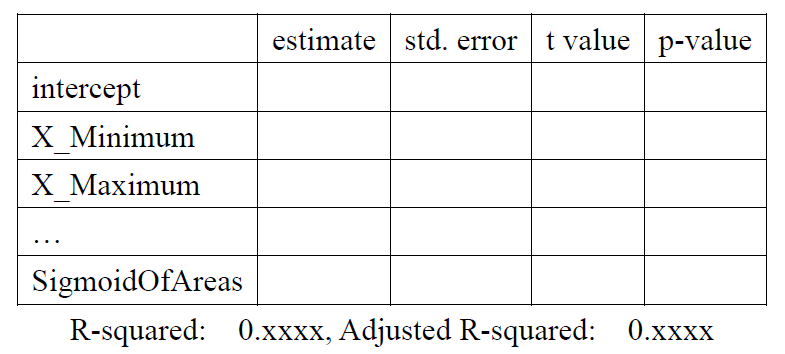

In [ ]:
# ! pip install openpyxl

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
xlxs_path = "./MDS_Assignment2_Steelplates.xlsx"
df = pd.read_excel(xlxs_path, sheet_name="Var_Name", header=None)
columns = df.iloc[:,0].to_numpy()
columns

df = pd.read_excel(xlxs_path, sheet_name="Faults", header=None, names=columns)
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [2]:
print('特徵27種:',columns[:27])
print('標籤 7種:',columns[27:])

特徵27種: ['X_Minimum' 'X_Maximum' 'Y_Minimum' 'Y_Maximum' 'Pixels_Areas'
 'X_Perimeter' 'Y_Perimeter' 'Sum_of_Luminosity' 'Minimum_of_Luminosity'
 'Maximum_of_Luminosity' 'Length_of_Conveyer' 'TypeOfSteel_A300'
 'TypeOfSteel_A400' 'Steel_Plate_Thickness' 'Edges_Index' 'Empty_Index'
 'Square_Index' 'Outside_X_Index' 'Edges_X_Index' 'Edges_Y_Index'
 'Outside_Global_Index' 'LogOfAreas' 'Log_X_Index' 'Log_Y_Index'
 'Orientation_Index' 'Luminosity_Index' 'SigmoidOfAreas']
標籤 7種: ['Pastry' 'Z_Scratch' 'K_Scatch' 'Stains' 'Dirtiness' 'Bumps'
 'Other_Faults']


In [3]:
# 只取出指定的兩種 label 做分析
# # record_ids = (df["K_Scatch"] == 1) | (df["Bumps"] == 1) 
# df_filter = df.loc[record_ids]

x = df.iloc[:, 0:27]
# x_bump = df.iloc[:, 0:27]
y_bump = df["Bumps"]
print('num of bump samples:', len(df[df["Bumps"] == 1]), 'out of', len(df))

# x_scatch = df.iloc[:, 0:27]
y_scatch = df["K_Scatch"]
print('num of scatch samples:', len(df[df["K_Scatch"] == 1]), 'out of', len(df))

num of bump samples: 402 out of 1941
num of scatch samples: 391 out of 1941


##### Bumps Logistic Model

In [20]:
# Bumps = 1, other = 0 in this condition
s_x = sm.add_constant(x)
model_bump = sm.MNLogit(y_bump, s_x).fit()
print(model_bump.summary())

         Current function value: nan
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                  Bumps   No. Observations:                 1941
Model:                        MNLogit   Df Residuals:                     1914
Method:                           MLE   Df Model:                           26
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                     nan
Time:                        10:28:44   Log-Likelihood:                    nan
converged:                      False   LL-Null:                       -990.11
Covariance Type:            nonrobust   LLR p-value:                       nan
              Bumps=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -12.9897        nan        nan        nan         nan         nan
X_Minimum                 0.0441     

c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


In [24]:
# confusion matrix of class Bumps prediction
# model_bump.pred_table() 一行搞定版
pred = np.array(model_bump.predict(s_x) > 0.5, dtype=float)
table = np.histogram2d(y_bump, pred[:,1], bins=2)[0]
table

array([[1451.,   88.],
       [ 229.,  173.]])

##### K_Scatch Logistic Model

In [28]:
# K_Scatch = 1, other = 0 in this condition
s_x = sm.add_constant(x)
model_scatch = sm.MNLogit(y_scatch, s_x).fit()
print(model_scatch.summary())

Optimization terminated successfully.
         Current function value: 0.055606
         Iterations 16
                          MNLogit Regression Results                          
Dep. Variable:               K_Scatch   No. Observations:                 1941
Model:                        MNLogit   Df Residuals:                     1914
Method:                           MLE   Df Model:                           26
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.8893
Time:                        10:40:10   Log-Likelihood:                -107.93
converged:                       True   LL-Null:                       -975.15
Covariance Type:            nonrobust   LLR p-value:                     0.000
           K_Scatch=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.0169        nan        nan        nan         nan        

c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


In [29]:
# confusion matrix of class K_Scatch prediction
model_scatch.pred_table()

array([[1536.,   14.],
       [  25.,  366.]])

#### Q5-(2) 
基於上述(1)的 結果，將上述特徵以t-value進行排序後，哪些特徵的迴 歸係數在統計上是顯著的呢(p-value<0.01)?

In [38]:
p_values_bump = model_bump.pvalues
p_values_bump = p_values_bump[p_values_bump[0] < 0.01]
p_values_bump.sort_values(by=0)

,0
Y_Minimum,8.905653e-08
Y_Maximum,8.905915e-08
Edges_Y_Index,2.647692e-07
Edges_Index,7.053109e-07
Y_Perimeter,5.118999e-06
X_Perimeter,1.010214e-03
Steel_Plate_Thickness,1.335119e-03
Square_Index,1.956418e-03
Luminosity_Index,7.801371e-03


In [39]:
p_values_scatch = model_scatch.pvalues
p_values_scatch = p_values_scatch[p_values_scatch[0] < 0.01]
p_values_scatch.sort_values(by=0)

,0
Orientation_Index,9.283976e-07
Luminosity_Index,7.765839e-06
X_Perimeter,8.019708e-05
Edges_X_Index,2.894543e-04
Log_Y_Index,5.051630e-04
Square_Index,1.242161e-03
Outside_Global_Index,1.772720e-03
Pixels_Areas,5.305806e-03
Empty_Index,5.463242e-03
Edges_Index,6.909960e-03


#### Q5-(3) 
試問配適一個羅吉斯迴歸模型是否合適？試若配適不佳，試說明其可能的原因為何？

#### Q5-(4)
試問配適一個線性判別分析模型是否合適？若配適不佳，試說明其可能的原因為何？

In [9]:
# 生成模型可一次預測多類別，將資料做成多類別的
# 0: 正常無缺陷, 1: Bumps, 2: K_Scatch
K_Scatch_ids = df.index[df['K_Scatch'] == 1].tolist()
Bumps_ids = df.index[df['Bumps'] == 1].tolist()
y_true = [0]*len(df)

for i in Bumps_ids:
    y_true[i] = 1
for i in K_Scatch_ids:
    y_true[i] = 2

from collections import Counter
Counter(y_true)

Counter({0: 1148, 2: 391, 1: 402})

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x, y_true)

In [22]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x)
report = classification_report(y_true, y_pred, target_names=['Noraml','Bumps','K_Scatch'])
print(report)

              precision    recall  f1-score   support

      Noraml       0.80      0.89      0.84      1148
       Bumps       0.61      0.48      0.54       402
    K_Scatch       0.96      0.84      0.90       391

    accuracy                           0.79      1941
   macro avg       0.79      0.74      0.76      1941
weighted avg       0.79      0.79      0.79      1941



#### Q5-(5)
試問配適一個二次判別分析模型是否合適？若配適不佳，試說明其可能的原因為何？  
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(x, y_true)

from sklearn.metrics import classification_report
y_pred = clf.predict(x)
report = classification_report(y_true, y_pred, target_names=['Noraml','Bumps','K_Scatch'])
print(report)

              precision    recall  f1-score   support

      Noraml       0.92      0.43      0.59      1148
       Bumps       0.36      0.94      0.52       402
    K_Scatch       0.99      0.91      0.95       391

    accuracy                           0.63      1941
   macro avg       0.76      0.76      0.68      1941
weighted avg       0.82      0.63      0.64      1941



c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
